(700, 934)
잘려진 사진 크기 : (500, 500)


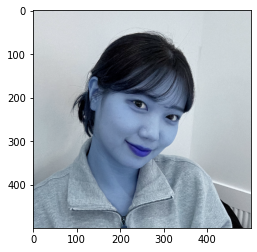

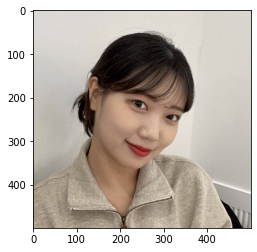

In [1]:
# Step 1. 스티커 구하기 or 만들기

import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
from PIL import Image

# 사진 자르기
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image2.png'
image1 = Image.open(my_image_path)
cro = image1.crop((100,200,600,700))
print(image1.size)
print("잘려진 사진 크기 :",cro.size)
cro.save('crop_img.PNG')

img_bgr = cv2.imread('crop_img.png')
img_show = img_bgr.copy()# 출력용 이미지를 따로 보관합니다
img_bgr2 = img_bgr.copy()
img_add = img_bgr.copy()

plt.imshow(img_bgr)
plt.show()

# RGB 이미지로 바꾸기 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

rectangles[[(159, 180) (345, 366)]]


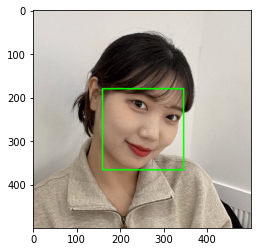

68


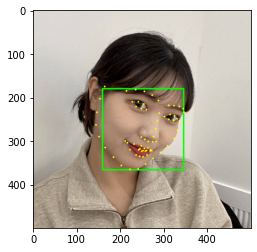

In [2]:
# Step 2. 얼굴 검출 & 랜드마크 검출 하기
#- 오늘 배운 dlib을 이용해서 얼굴의 bounding box 위치와 landmark의 위치를 찾아주세요.

# detector 선언
detector_hog = dlib.get_frontal_face_detector()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

# 찾은 얼굴 영역 박스 리스트
print(dlib_rects)   
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# landmark 모델을 불러오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

# 얼굴 영역 박스 마다 face landmark 찾아냄
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

# 랜드마크 영상 출력
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2,(0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [3]:
# Step 3. 스티커 적용 위치 확인하기
#- 고양이 수염이 적용 될 위치를 landmark를 사용해서 계산해 주세요.
#- 코 끝인 33 번보다 좋은 위치가 있을 거예요.

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(276, 290)
(x,y) : (276,197)
(w,h) : (187,187)


(187, 187, 3)
(x,y) : (183,197)


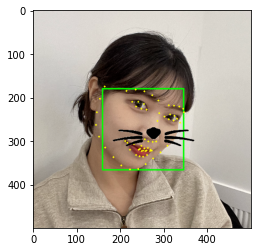

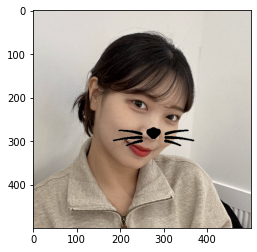

In [4]:
# Step 4. 스티커 적용하기

#- (1) 오늘 배운 np.where 를 사용해서 스티커를 적용해 주세요.
#- (2) 스티커를 조금 더 자연스럽게 보이게 하려면 어떻게 해야 할까요? 
#- 스티커 뒤로 원본 이미지가 같이 보이도록 만들어 봅시다. 
#- opencv 의 cv2.addWeighted() 를 참고하세요.

sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

refined_x = x - w // 2
refined_y = y
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

# 길어서 복잡해 보이지만 img_show[from:to] 형식입니다
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
sticker_area2 = img_add[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

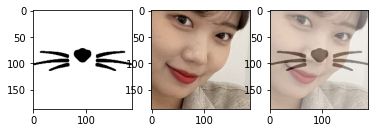

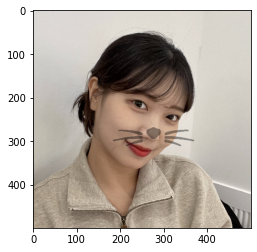

In [5]:
#투명도 조절하기
img_add = cv2.cvtColor(img_add, cv2.COLOR_BGR2RGB)
sticker_area2 = cv2.cvtColor(sticker_area2, cv2.COLOR_BGR2RGB)

fig = plt.figure()

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)


dst = cv2.addWeighted(sticker_area2, 0.6, img_sticker, 0.4, 0)

ax1.imshow(img_sticker)
ax2.imshow(sticker_area2)
ax3.imshow(dst)

plt.show()

# 전체 사진
img_bgr2[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
# Step 5. 문제점 찾아보기

import os
import cv2
import dlib
import matplotlib.pyplot as plt
import numpy as np

def make_sticker_img(img_path, sticker_path, img_w, img_h):
    img_bgr = cv2.imread(img_path)
    img_bgr = cv2.resize(img_bgr, (img_w, img_h))

    img_show = img_bgr.copy()
    img_bgr2 = img_bgr.copy()
    img_add = img_bgr.copy()


    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    detector_hog = dlib.get_frontal_face_detector() 
    dlib_rects = detector_hog(img_rgb, 1)
    
    
    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()

        cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

    img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    
    model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    landmark_predictor = dlib.shape_predictor(model_path)

    list_landmarks = []
    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb, dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)

    print(len(list_landmarks[0]))

    for landmark in list_landmarks:
        for point in landmark:
            cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

    img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    
    for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
        x = landmark[30][0]
        y = landmark[30][1] - dlib_rect.height()//2
        w = h = dlib_rect.width()
    
        refined_x = x - w // 2
        refined_y = y
        print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

    sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    sticker_area2 = img_add[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

    img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
    
    
    sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

    img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
    
    fig = plt.figure()

    ax2 = fig.add_subplot(1,2,1)
    ax3 = fig.add_subplot(1,2,2)

    ax2.imshow(img_show_rgb)
    ax3.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))

    plt.show()

1번 : 
68
(x,y) : (302,118)


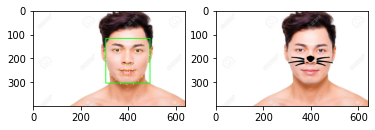

In [7]:
print('1번 : ')
make_sticker_img(os.getenv('HOME')+'/aiffel/camera_sticker/images/img_1.png',\
                 os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png',640,400)

2번 :
68
(x,y) : (183,145)


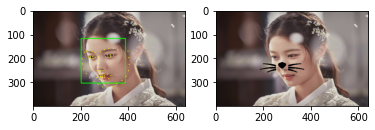

In [8]:
print('2번 :')
make_sticker_img(os.getenv('HOME')+'/aiffel/camera_sticker/images/img_2.png',\
                 os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png',640,400)

3번
68
(x,y) : (218,130)


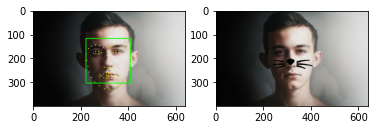

In [9]:
print('3번')
make_sticker_img(os.getenv('HOME')+'/aiffel/camera_sticker/images/img_8.png',\
                 os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png',640,400)

4번
68
(x,y) : (199,50)


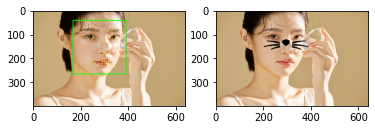

In [10]:
print('4번')
make_sticker_img(os.getenv('HOME')+'/aiffel/camera_sticker/images/img_4.png',\
                 os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png',640,400)

5번
68
(x,y) : (215,337)


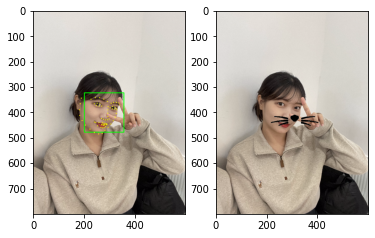

In [15]:
print('5번')
make_sticker_img(os.getenv('HOME')+'/aiffel/camera_sticker/images/image3.png',\
                 os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png',600,800)

    (1) 셀프 카메라를 다양한 각도에서 촬영하면서 스티커를 반복해서 적용해 보세요.
    (2) 문제점이 무엇인지 최대한 자세하게 기록해 보세요.     

    - 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?
    - 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?
    - 실행 속도가 중요할까요?
    - 스티커앱을 만들 때 정확도가 얼마나 중요할까요?

 1. 2번 사진처럼 얼굴각도가 틀어질 때 스티커도 같이 회전하거나 틀어져야 자연스러울 것 같다.
 2. 4번과 5번 사진처럼 손이 올라오는 경우에는 코의 위치를 잘 못 잡는 경향이 있다.
 3. 3번 사진으로 봤을 때, 어두운 사진도 구분이 잘 되긴 한다. 하지만 아예 더 어두운 이미지로 하면 결과가 어떨지 궁금하다.
 4. 실행 속도와 정확성 중에서는 정확성이 더 중요하지 않을까,, 
 5. 앱 쓸 때 정확한 위치에 스티커가 와야지 사람들이 계속 쓸 것 같다, 속도는 그 다음이라고 생각한다.